# Movielens Case Study

DESCRIPTION

Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Domain: Entertainment

Analysis Tasks to be performed:

Import the three datasets
Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
User Age Distribution
User rating of the movie “Toy Story”
Top 25 movies by viewership rating
Find the ratings for all the movies reviewed by for a particular user of user id = 2696
Feature Engineering:
            Use column genres:

Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
Determine the features affecting the ratings of any particular movie.
Develop an appropriate model to predict the movie ratings
Dataset Description :

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

Ratings.dat
    Format - UserID::MovieID::Rating::Timestamp

Field	Description
UserID	Unique identification for each user
MovieID	Unique identification for each movie
Rating	User rating for each movie
Timestamp	Timestamp generated while adding user review
UserIDs range between 1 and 6040 
The MovieIDs range between 1 and 3952
Ratings are made on a 5-star scale (whole-star ratings only)
A timestamp is represented in seconds since the epoch is returned by time(2)
Each user has at least 20 ratings
 

Users.dat
Format -  UserID::Gender::Age::Occupation::Zip-code

Field	Description
UserID	Unique identification for each user
Genere	Category of each movie
Age	User’s age
Occupation	User’s Occupation
Zip-code	Zip Code for the user’s location
All demographic information is provided voluntarily by the users and is not checked for accuracy. Only users who have provided demographic information are included in this data set.

Gender is denoted by an "M" for male and "F" for female
Age is chosen from the following ranges:
 

Value	Description
1	"Under 18"
18	"18-24"
25	"25-34"
35	"35-44"
45	"45-49"
50	"50-55"
56	"56+"
 

Occupation is chosen from the following choices:
Value
 	Description
0	"other" or not specified
1	"academic/educator"
2	"artist”
3	"clerical/admin"
4	"college/grad student"
5	"customer service"
6	"doctor/health care"
7	"executive/managerial"
8	"farmer"
9	"homemaker"
10	"K-12 student"
11	"lawyer"
12	"programmer"
13	"retired"
14	 "sales/marketing"
15	"scientist"
16	 "self-employed"
17	"technician/engineer"
18	"tradesman/craftsman"
19	"unemployed"
20	"writer”

Movies.dat
Format - MovieID::Title::Genres

Field	Description
MovieID	Unique identification for each movie
Title	A title for each movie
Genres	Category of each movie
 

 Titles are identical to titles provided by the IMDB (including year of release)
 

Genres are pipe-separated and are selected from the following genres:
Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
Movies are mostly entered by hand, so errors and inconsistencies may exist
 

 


Good Luck!!

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_user=pd.read_csv('users.dat',sep="::",names=['UserID','Gender','Age','Occupation','Zip Code'],engine='python')

In [3]:
df_user

,UserID,Gender,Age,Occupation,Zip Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [13]:
df_movies=pd.read_csv('movies.dat',sep="::",names=['MovieID','Title','Generes'],engine='python',encoding='latin-1')

In [14]:
df_movies

,MovieID,Title,Generes
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [15]:
df_ratings=pd.read_csv('ratings.dat',sep="::",names=['UserID','MovieID','Ratings','Timestamps'],engine='python')

In [16]:
df_ratings

,UserID,MovieID,Ratings,Timestamps
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [17]:
df_user=pd.read_csv('users.dat',sep="::",names=['UserID','Gender','Age','Occupation','Zip Code'],engine='python')

In [18]:
df_user

,UserID,Gender,Age,Occupation,Zip Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [19]:
df_movies.shape

(3883, 3)

In [20]:
df_user.shape

(6040, 5)

In [21]:
df_ratings.shape

(1000209, 4)

# Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [22]:
dfMovieRatings=df_movies.merge(df_ratings,on='MovieID',how='inner')

In [23]:
dfMovieRatings

,MovieID,Title,Generes,UserID,Ratings,Timestamps
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [25]:
dfMaster = dfMovieRatings.merge(df_user, on = 'UserID' , how = 'inner') 
#left right inner


In [26]:
dfMaster

,MovieID,Title,Generes,UserID,Ratings,Timestamps,Gender,Age,Occupation,Zip Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


# # Explore the datasets using visual representations (graphs or tables), also include your comments on the following: User Age Distribution User rating of the movie “Toy Story” Top 25 movies by viewership rating Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [27]:
#user age distribution
dfMaster['Age'].value_counts()


25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

<AxesSubplot:>

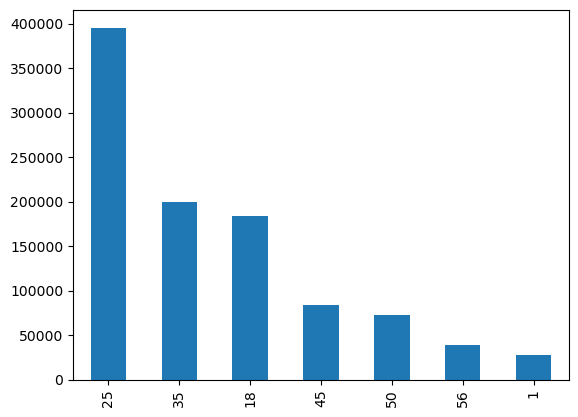

In [28]:
dfMaster['Age'].value_counts().plot(kind='bar')

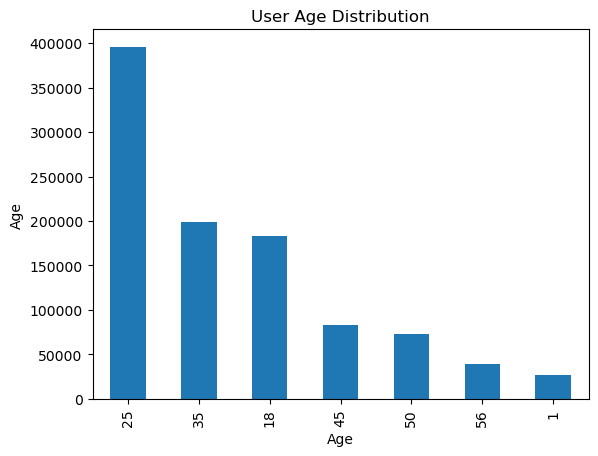

In [29]:
dfMaster['Age'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.title('User Age Distribution')
plt.ylabel('Age')
plt.show()


User rating of the movie “Toy Story”

In [30]:
dfMaster.head()

,MovieID,Title,Generes,UserID,Ratings,Timestamps,Gender,Age,Occupation,Zip Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [35]:
# Extract toy story movies
toystory=dfMaster[dfMaster['Title'].str.contains('Toy Story')==True]
toystory

,MovieID,Title,Generes,UserID,Ratings,Timestamps,Gender,Age,Occupation,Zip Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


In [38]:
toystory.groupby(['Title','Ratings']).size()

Title               Ratings
Toy Story (1995)    1           16
                    2           61
                    3          345
                    4          835
                    5          820
Toy Story 2 (1999)  1           25
                    2           44
                    3          214
                    4          578
                    5          724
dtype: int64

<AxesSubplot:ylabel='Title'>

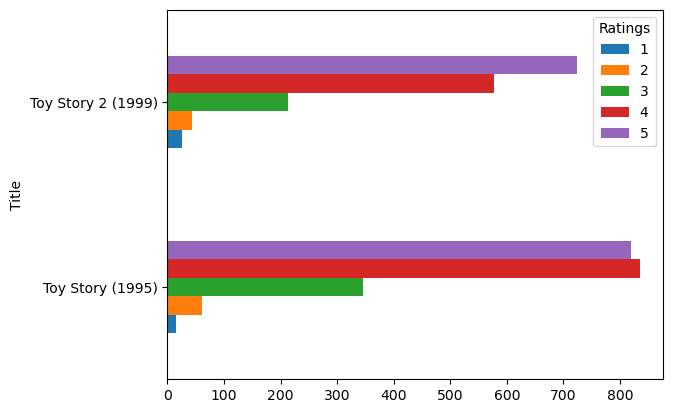

In [39]:
toystory.groupby(['Title','Ratings']).size().unstack().plot(kind='barh',legend=True)

# user rating of the movie "Toy Story"

In [41]:
dfMaster.head()

,MovieID,Title,Generes,UserID,Ratings,Timestamps,Gender,Age,Occupation,Zip Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [ ]:
plt.figure
dfTop25.plot(kind='barh')

In [42]:
#Top 25 movies by viewership rating
dfTop25=dfMaster.groupby('Title').size().sort_values(ascending=False)[:25]
dfTop25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

<AxesSubplot:ylabel='Title'>

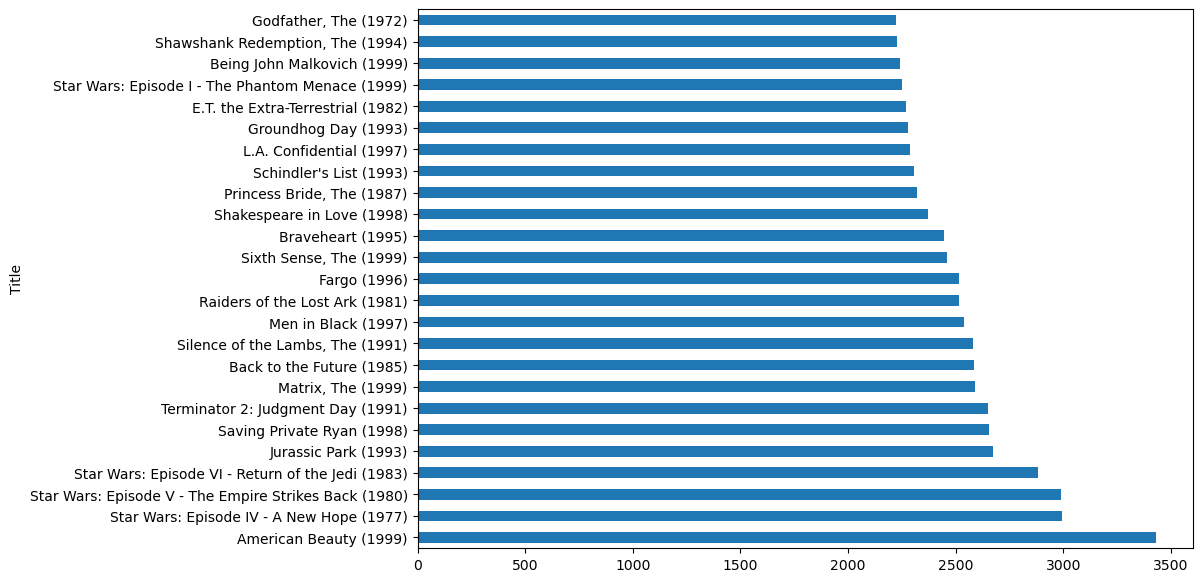

In [43]:
plt.figure(figsize=(10,7))
dfTop25.plot(kind='barh')

# Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [53]:
df_2696R=dfMaster[dfMaster['UserID']==2696]
df_2696R

,MovieID,Title,Generes,UserID,Ratings,Timestamps,Gender,Age,Occupation,Zip Code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


In [55]:
df_2696R.shape

(20, 10)

# Feature Engineering:

Use column genres:
1.Find out all the unique genres (Hint: split the data in column genre making a list and then     process the data to find out only the unique categories of genres)
2.Create a separate column for each genre category with a one-hot encoding ( 1 and 0)         whether or not the movie belongs to that genre. 
3.Determine the features affecting the ratings of any particular movie.
4.Develop an appropriate model to predict the movie ratings


In [56]:
dfMaster['Generes']

0                   Animation|Children's|Comedy
1          Animation|Children's|Musical|Romance
2                                         Drama
3               Action|Adventure|Fantasy|Sci-Fi
4                                     Drama|War
                           ...                 
1000204                          Drama|Thriller
1000205                  Comedy|Horror|Thriller
1000206                          Comedy|Romance
1000207                         Action|Thriller
1000208                            Action|Drama
Name: Generes, Length: 1000209, dtype: object

In [57]:
# str1='Hello world'
# li=str1.split()
# li

['Hello', 'world']

In [58]:
dfGeneres=dfMaster['Generes'].str.split()
dfGeneres

0                   [Animation|Children's|Comedy]
1          [Animation|Children's|Musical|Romance]
2                                         [Drama]
3               [Action|Adventure|Fantasy|Sci-Fi]
4                                     [Drama|War]
                            ...                  
1000204                          [Drama|Thriller]
1000205                  [Comedy|Horror|Thriller]
1000206                          [Comedy|Romance]
1000207                         [Action|Thriller]
1000208                            [Action|Drama]
Name: Generes, Length: 1000209, dtype: object

In [64]:
listgeneres=set()
for genre in dfGeneres:
    listgeneres=listgeneres.union(set(genre))

In [65]:
listgeneres

{'Action',
 'Action|Adventure',
 'Action|Adventure|Animation',
 "Action|Adventure|Animation|Children's|Fantasy",
 'Action|Adventure|Animation|Horror|Sci-Fi',
 "Action|Adventure|Children's",
 "Action|Adventure|Children's|Comedy",
 "Action|Adventure|Children's|Fantasy",
 "Action|Adventure|Children's|Sci-Fi",
 'Action|Adventure|Comedy',
 'Action|Adventure|Comedy|Crime',
 'Action|Adventure|Comedy|Horror',
 'Action|Adventure|Comedy|Horror|Sci-Fi',
 'Action|Adventure|Comedy|Romance',
 'Action|Adventure|Comedy|Sci-Fi',
 'Action|Adventure|Comedy|War',
 'Action|Adventure|Crime',
 'Action|Adventure|Crime|Drama',
 'Action|Adventure|Crime|Thriller',
 'Action|Adventure|Drama',
 'Action|Adventure|Drama|Romance',
 'Action|Adventure|Drama|Sci-Fi|War',
 'Action|Adventure|Drama|Thriller',
 'Action|Adventure|Fantasy',
 'Action|Adventure|Fantasy|Sci-Fi',
 'Action|Adventure|Horror',
 'Action|Adventure|Horror|Thriller',
 'Action|Adventure|Mystery',
 'Action|Adventure|Mystery|Sci-Fi',
 'Action|Adventure|Roma

In [66]:
len(listgeneres)

301

In [70]:
GeneresOnehot=dfMaster['Generes'].str.get_dummies('|')

In [71]:
GeneresOnehot

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1000206,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1000207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [72]:
dfMaster=pd.concat([dfMaster,GeneresOnehot],axis=1)

In [73]:
dfMaster

,MovieID,Title,Generes,UserID,Ratings,Timestamps,Gender,Age,Occupation,Zip Code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,...,0,0,1,0,0,0,0,1,0,0
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,...,0,0,0,0,0,1,0,0,0,0
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0


In [87]:
# to csv file
dfMaster.to_csv('NewdfMaste.csv')

In [77]:
#convert gender-M-0 and F-1, convert into integer
dfMaster['Gender']=dfMaster['Gender'].replace('M','0')
dfMaster['Gender']=dfMaster['Gender'].replace('F','1')

In [78]:
dfMaster['Gender']

0          1
1          1
2          1
3          1
4          1
          ..
1000204    0
1000205    0
1000206    0
1000207    0
1000208    0
Name: Gender, Length: 1000209, dtype: object

In [79]:
dfMaster['Gender']=dfMaster['Gender'].astype('int')

In [80]:
dfMaster['Gender']

0          1
1          1
2          1
3          1
4          1
          ..
1000204    0
1000205    0
1000206    0
1000207    0
1000208    0
Name: Gender, Length: 1000209, dtype: int32

In [81]:
#impact ratings
#Gender vs Ratings
GenderAffecting=dfMaster.groupby('Gender').size().sort_values(ascending=False)[:25]

In [82]:
GenderAffecting

Gender
0    753769
1    246440
dtype: int64

<AxesSubplot:xlabel='Gender'>

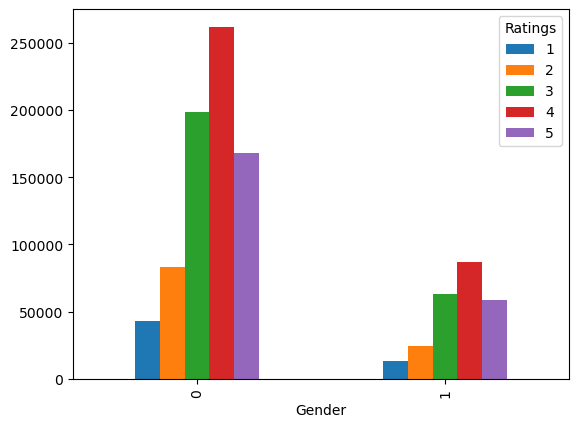

In [84]:
dfMaster.groupby(['Gender','Ratings']).size().unstack().plot(kind='bar',legend=True)

<AxesSubplot:xlabel='Age'>

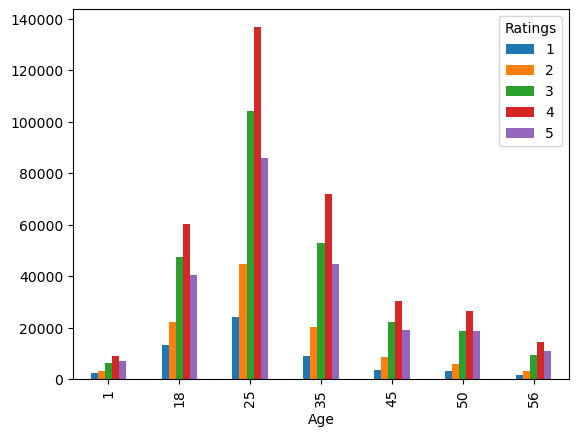

In [85]:
dfMaster.groupby(['Age','Ratings']).size().unstack().plot(kind='bar',legend=True)

<AxesSubplot:xlabel='Occupation'>

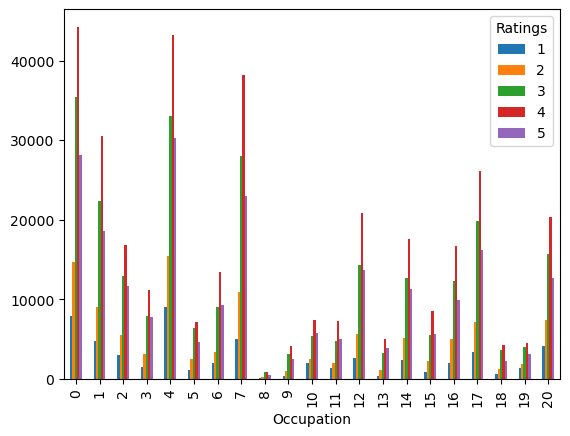

In [86]:
dfMaster.groupby(['Occupation','Ratings']).size().unstack().plot(kind='bar',legend=True)

# Develop an appropriate model to predict the movie ratings

In [91]:
#macine learning
# first 500 records
new_data=dfMaster[:500]

In [93]:
new_data.shape

(500, 28)

In [94]:
new_data

,MovieID,Title,Generes,UserID,Ratings,Timestamps,Gender,Age,Occupation,Zip Code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,10,5,979167660,1,35,1,95370,...,0,0,0,0,0,1,0,0,0,0
496,1198,Raiders of the Lost Ark (1981),Action|Adventure,10,5,978225630,1,35,1,95370,...,0,0,0,0,0,0,0,0,0,0
497,1200,Aliens (1986),Action|Sci-Fi|Thriller|War,10,5,979168160,1,35,1,95370,...,0,0,0,0,0,0,1,1,1,0
498,1201,"Good, The Bad and The Ugly, The (1966)",Action|Western,10,2,978225853,1,35,1,95370,...,0,0,0,0,0,0,0,0,0,1


In [95]:
new_data.columns


Index(['MovieID', 'Title', 'Generes', 'UserID', 'Ratings', 'Timestamps',
       'Gender', 'Age', 'Occupation', 'Zip Code', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [104]:
fetures=new_data[['MovieID','Age','Occupation','Gender']].values

In [101]:
fetures

,MovieID,Age,Occupation,Gender
0,1,1,10,1
1,48,1,10,1
2,150,1,10,1
3,260,1,10,1
4,527,1,10,1
...,...,...,...,...
495,1197,35,1,1
496,1198,35,1,1
497,1200,35,1,1
498,1201,35,1,1


In [102]:
label=new_data[['Ratings']].values

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(fetures,label,test_size=0.20,random_state=42)

In [107]:
X_train.shape

(400, 4)

In [108]:
X_test.shape

(100, 4)

In [116]:
from sklearn.linear_model  import  LinearRegression #y=bo+b1X1+b2X2..
lr=LinearRegression()
lr=LinearRegression()

In [117]:
lr.fit(X_train,y_train)

LinearRegression()

In [118]:
lr.predict(X_test)

array([[3.46596348],
       [3.96471588],
       [4.31047093],
       [3.99788954],
       [3.68849118],
       [4.27254115],
       [4.30172875],
       [4.05316268],
       [4.02252707],
       [4.18751639],
       [4.2936504 ],
       [3.81923886],
       [4.26506799],
       [3.90352061],
       [4.31625205],
       [4.28057831],
       [4.14845859],
       [4.13671417],
       [3.75346841],
       [4.24955767],
       [4.15804678],
       [4.15720077],
       [3.90518754],
       [3.49627911],
       [3.96076779],
       [4.18032524],
       [4.14803558],
       [3.7680548 ],
       [3.75335251],
       [3.65335635],
       [4.17130106],
       [3.64912626],
       [4.19047745],
       [3.92527304],
       [4.35822974],
       [3.65561239],
       [4.24391756],
       [3.97811115],
       [3.78314211],
       [4.05270169],
       [4.28791046],
       [3.82230294],
       [4.16199486],
       [3.84659342],
       [4.10287347],
       [3.95963977],
       [4.37923917],
       [4.277

In [119]:
y_pred=lr.predict(X_test)

In [120]:
# error 
from sklearn.metrics import mean_squared_error
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

Mean Squared Error 0.6489142338657047


In [121]:
from sklearn.metrics import r2_score
print('R2 score',r2_score(y_test,y_pred))

R2 score -0.07240825295935327
